In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

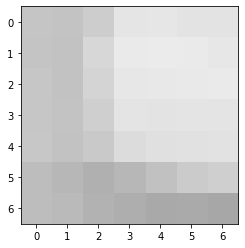

In [3]:
im1 = cv2.imread("nose_left.png")
plt.imshow(im1)

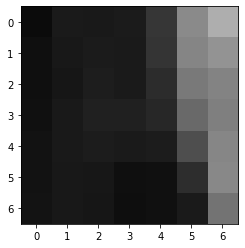

In [4]:
im2 = cv2.imread("nose_right.png")
plt.imshow(im2)

In [5]:
def sad(image1, image2):
    image1 = image1.astype(np.int8)
    image2 = image2.astype(np.int8)
    return abs(image1-image2).sum()

In [6]:
checks = [cv2.imread("nose1.png"),cv2.imread("nose2.png"),cv2.imread("nose3.png")]
template = im1.copy()
sads = [sad(x,template) for x in checks]
min_index = sads.index(min(sads))
min_index, template.shape
print(sads)

[3987, 357, 4470]


In [7]:
span = cv2.imread("nose_span.png")
span.shape, 384-376

((7, 384, 3), 8)

357


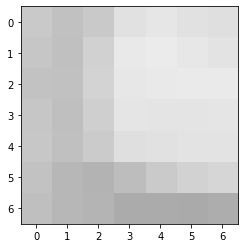

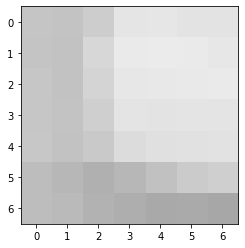

In [8]:
min_sad = np.inf
match = np.zeros_like(im1)
for i in range(7, span.shape[1]):
    window = span[:,i-7:i]
    window_sad = sad(window,template)
    if window_sad < min_sad:
        match = window
        min_sad = window_sad
plt.imshow(match)
plt.figure(2)
plt.imshow(template)
print(min_sad)

(<matplotlib.image.AxesImage at 0x2117bc2cd90>, numpy.uint8)

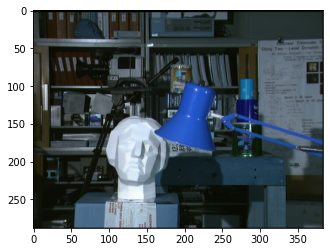

In [9]:
tl = cv2.imread("tsukuba_left.png")
tr = cv2.imread("tsukuba_right.png")
plt.imshow(tr), type(tr[0][0][0])

In [10]:
int(tr.shape[0]/7), int(tr.shape[1]/7)

(41, 54)

In [54]:
tl = cv2.imread("tsukuba_left.png").astype(np.int16)
tr = cv2.imread("tsukuba_right.png").astype(np.int16)
disparity_map = np.zeros_like(tl[:,:])
for j in range(7, tl.shape[0]): # over rows of right
    row7b7 = tr[j-7:j]
    for k in range(7, row7b7.shape[1]): # take every possible template from left
        min_sad = np.inf
        template = tl[j-7:j,k-7:k]
        xl = int((k-7+k)/2)
        match = np.zeros_like(template)
        for i in range(7, min(int(row7b7.shape[1]),k+7)): # compare it to all row blocks in right
            window = row7b7[:,i-7:i]
            window_sad = sad(window,template)
            if window_sad < min_sad:
                match = window
                min_sad = window_sad
                xr = int((i-7+i)/2)
        row = int((j-7+j)/2)
        col = int((k-7+k)/2)
        disparity_map[row,col] = xl-xr

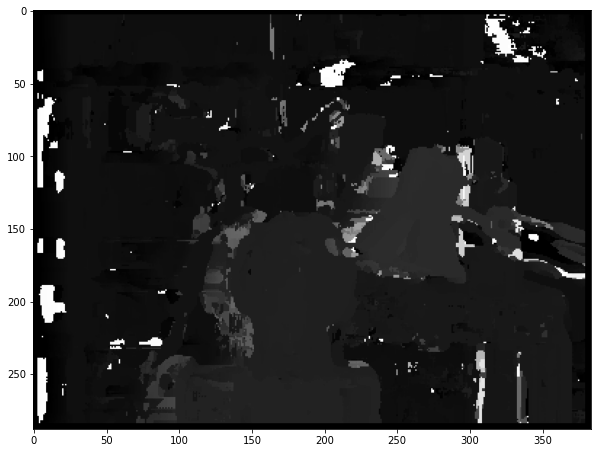

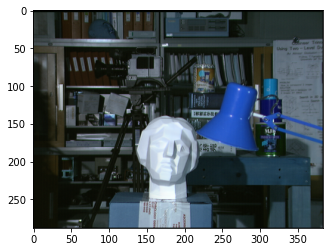

In [55]:
plt.figure(figsize=(10,10))
summed = disparity_map.astype(np.float16).sum(2)
summed = (summed / summed.max() * 255).astype(np.uint8)
plt.imshow(summed, cmap='gray')
plt.figure(2)
plt.imshow(tl)
# ().min(),(disparity_map-disparity_map.min()).max(),disparity_map.min(),disparity_map.max()
# plt.imshow((disparity_map[:,:,1]-disparity_map[:,:,1].min()),cmap='gray')

In [ ]:
template = np.ones((7,7))
row = np.full((7,300),7)
# np.subtract(row,template)
np.repeat(template,row.shape[1]/7,axis=1).shape, row.shape